### What is the best Place to Launch a Restaurant in Nairobi County, Kenya?? Analysis

### Problem Statement

Topic: What would be the best Location to Open a Restaurant in Nairobi City, Kenya - Africa

Kenya's capital city, Nairobi, is the most dynamic city in East Africa, also known as "green city in the sun". Its kenya's largest city and has a population of nearly 4 million. As the largest center of business and trade in East Africa and a regional location of various international companies and organizations, Nairobi has amased alot of interests from investors looking to launch restaurants, hotel, lodges and budget accommodations but the big question is: **What would be the best location to set up a restaurant that is likely to guarantee a return on investement within Nairobi?** and **What are the major factors that contribute to the setup of restaurants in a particular location within Nairobi Town?**

In [207]:
## Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10, 8)})

### Lets get the Latitude and Longitude of Nairobi, Kenya

In [21]:
address = 'Nairobi, Kenya'

geolocator = Nominatim(user_agent="nairobi_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nairobi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nairobi are -1.2832533, 36.8172449.


### Import Data with Longitudes and Latitudes

In [22]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'constituency_ward_lat_long.csv',
 'Extracting - Latitude and Longitude from Wards and Constituencies.ipynb',
 'Extracting Nairobi Constituencies and Wards.ipynb',
 'Mapping of Nairobi Wards.ipynb',
 'README.md']

In [23]:
nairobi_df = pd.read_csv("constituency_ward_lat_long.csv")
nairobi_df.head()

,Unnamed: 0,Constituency,Wards,Latitude,Longitude
0,0,Westlands,Kitisuru,-1.239554,36.783965
1,1,Westlands,Parklands/Highridge,-1.263062,36.810629
2,2,Westlands,Karura,-1.236988,36.832559
3,3,Westlands,Kangemi,-1.265426,36.752518
4,4,Westlands,Mountain View,-1.271131,36.743003


In [24]:
# Remove unwanted Unnamed Column
nairobi_df.drop(columns=["Unnamed: 0"], inplace=True)
nairobi_df.head()

,Constituency,Wards,Latitude,Longitude
0,Westlands,Kitisuru,-1.239554,36.783965
1,Westlands,Parklands/Highridge,-1.263062,36.810629
2,Westlands,Karura,-1.236988,36.832559
3,Westlands,Kangemi,-1.265426,36.752518
4,Westlands,Mountain View,-1.271131,36.743003


In [25]:
map_nairobi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nairobi_df['Latitude'], nairobi_df['Longitude'], nairobi_df['Wards']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_nairobi)  
    
map_nairobi

In [26]:
nairobi_df.head()

,Constituency,Wards,Latitude,Longitude
0,Westlands,Kitisuru,-1.239554,36.783965
1,Westlands,Parklands/Highridge,-1.263062,36.810629
2,Westlands,Karura,-1.236988,36.832559
3,Westlands,Kangemi,-1.265426,36.752518
4,Westlands,Mountain View,-1.271131,36.743003


In [27]:
nairobi_df.Wards.unique()

array(['Kitisuru\xa0', ' Parklands/Highridge\xa0', ' Karura\xa0',
       ' Kangemi\xa0', ' Mountain View', 'Kilimani\xa0',
       ' Kawangware\xa0', ' Gatina\xa0', ' Kileleshwa\xa0', ' Kabiro',
       'Mutu-ini\xa0', ' Riruta\xa0', ' Uthiru/Ruthimitu\xa0',
       ' Waithaka', 'Karen\xa0', ' Nairobi West\xa0', ' Mugumo-ini\xa0',
       ' South C\xa0', ' Nyayo Highrise', 'Laini Saba\xa0', ' Lindi\xa0',
       ' Makina\xa0', ' Woodley/Kenyatta Golf Course\xa0', " Sarang'ombe",
       'Githurai\xa0', ' Kahawa West\xa0', ' Zimmerman\xa0',
       ' Roysambu\xa0', ' Kahawa', 'Clay City\xa0', ' Mwiki\xa0',
       ' Kasarani\xa0', ' Njiru\xa0', ' Ruai', 'Babadogo\xa0',
       ' Utalii\xa0', ' Mathare North\xa0', ' Lucky Summer\xa0',
       ' Korogocho', 'Imara Daima\xa0', ' Kwa Njenga\xa0',
       ' Kwa Reuben\xa0', ' Pipeline\xa0', ' Kware',
       'Kariobangi North\xa0', ' Dandora Area I\xa0',
       ' Dandora Area II\xa0', ' Dandora Area III\xa0',
       ' Dandora Area IV', 'Kayole North\xa0

In [28]:
def clean_string(x):
    return x.replace(u'\xa0', ' ').encode('utf-8').decode('utf-8').strip()

# Testing clean_string
print(clean_string("Kitisuru\xa0"))

Kitisuru


In [29]:
nairobi_df.Wards = nairobi_df.Wards.apply(clean_string)
nairobi_df.Wards.values

array(['Kitisuru', 'Parklands/Highridge', 'Karura', 'Kangemi',
       'Mountain View', 'Kilimani', 'Kawangware', 'Gatina', 'Kileleshwa',
       'Kabiro', 'Mutu-ini', 'Riruta', 'Uthiru/Ruthimitu', 'Waithaka',
       'Karen', 'Nairobi West', 'Mugumo-ini', 'South C', 'Nyayo Highrise',
       'Laini Saba', 'Lindi', 'Makina', 'Woodley/Kenyatta Golf Course',
       "Sarang'ombe", 'Githurai', 'Kahawa West', 'Zimmerman', 'Roysambu',
       'Kahawa', 'Clay City', 'Mwiki', 'Kasarani', 'Njiru', 'Ruai',
       'Babadogo', 'Utalii', 'Mathare North', 'Lucky Summer', 'Korogocho',
       'Imara Daima', 'Kwa Njenga', 'Kwa Reuben', 'Pipeline', 'Kware',
       'Kariobangi North', 'Dandora Area I', 'Dandora Area II',
       'Dandora Area III', 'Dandora Area IV', 'Kayole North',
       'Kayole Central', 'Kayole South', 'Komarock',
       'Matopeni/Spring Valley', 'Upper Savanna', 'Lower Savanna',
       'Embakasi', 'Utawala', "Mihang'o", 'Umoja I', 'Umoja II', 'Mowlem',
       'Kariobangi South', 'Makongen

In [30]:
nairobi_df.head()

,Constituency,Wards,Latitude,Longitude
0,Westlands,Kitisuru,-1.239554,36.783965
1,Westlands,Parklands/Highridge,-1.263062,36.810629
2,Westlands,Karura,-1.236988,36.832559
3,Westlands,Kangemi,-1.265426,36.752518
4,Westlands,Mountain View,-1.271131,36.743003


### Setting Up FourSquare Credentials

In [31]:
CLIENT_ID = 'QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P' # your Foursquare ID
CLIENT_SECRET = 'QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P
CLIENT_SECRET:QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ


### Exploring the First Ward

In [32]:
nairobi_df.iloc[0]

Constituency     Westlands
Wards             Kitisuru
Latitude          -1.23955
Longitude           36.784
Name: 0, dtype: object

In [33]:
kitusuru_lat = nairobi_df.loc[0, "Latitude"]
kitusuru_long = nairobi_df.loc[0, "Longitude"]
print("Kitusuru Latitude {}, Kitusuru Longitude {}".format(kitusuru_lat, kitusuru_long))

Kitusuru Latitude -1.2395542, Kitusuru Longitude 36.7839651


### Lets fetch the top 100 venues around Kitusuru, within a radius of 500 metres

In [34]:
# FourSquare Query URL
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    kitusuru_lat, 
    kitusuru_long, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P&client_secret=QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ&v=20180605&ll=-1.2395542,36.7839651&radius=500&limit=100'

In [35]:
# Request Library
import requests

# send request
results = requests.get(url).json()
results["response"]['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '504b3e83e4b05763e991e17c',
   'name': 'Spa Exhale',
   'location': {'lat': -1.2395993225322157,
    'lng': 36.781348250500564,
    'labeledLatLngs': [{'label': 'display',
      'lat': -1.2395993225322157,
      'lng': 36.781348250500564}],
    'distance': 291,
    'cc': 'KE',
    'country': 'Kenya',
    'formattedAddress': ['Kenya']},
   'categories': [{'id': '4bf58dd8d48988d1ed941735',
     'name': 'Spa',
     'pluralName': 'Spas',
     'shortName': 'Spa',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-504b3e83e4b05763e991e17c-0'},
 {'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'v

In [36]:
# venues within 500m of Kitusuru
for row in results["response"]['groups'][0]['items']:
    print(row['venue']['categories'][0]['name'])

Spa
Shopping Mall
Karaoke Bar


### Lets fetch the top 100 venues around each Ward within a radius of 500 metres

In [37]:
# Helper Function: Fetch Categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Exploring the venues in Nairobi Wards

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# get nearby venues
nairobi_venues = getNearbyVenues(names=nairobi_df["Wards"], 
                                 latitudes=nairobi_df["Latitude"], 
                                 longitudes=nairobi_df["Longitude"])

Kitisuru
Parklands/Highridge
Karura
Kangemi
Mountain View
Kilimani
Kawangware
Gatina
Kileleshwa
Kabiro
Mutu-ini
Riruta
Uthiru/Ruthimitu
Waithaka
Karen
Nairobi West
Mugumo-ini
South C
Nyayo Highrise
Laini Saba
Lindi
Makina
Woodley/Kenyatta Golf Course
Sarang'ombe
Githurai
Kahawa West
Zimmerman
Roysambu
Kahawa
Clay City
Mwiki
Kasarani
Njiru
Ruai
Babadogo
Utalii
Mathare North
Lucky Summer
Korogocho
Imara Daima
Kwa Njenga
Kwa Reuben
Pipeline
Kware
Kariobangi North
Dandora Area I
Dandora Area II
Dandora Area III
Dandora Area IV
Kayole North
Kayole Central
Kayole South
Komarock
Matopeni/Spring Valley
Upper Savanna
Lower Savanna
Embakasi
Utawala
Mihang'o
Umoja I
Umoja II
Mowlem
Kariobangi South
Makongeni
Maringo/Hamza
Harambee
Viwandani
Pumwani
Eastleigh North
Eastleigh South
Nairobi Central
Ngara
Ziwani/Kariokor
Pangani
Landimawe
Nairobi South
Hospital
Mabatini
Huruma
Ngei
Mlango Kubwa
Kiamaiko


In [39]:
nairobi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kitisuru,-1.239554,36.783965,Spinners Web,-1.238854,36.781050,Shopping Mall
1,Kitisuru,-1.239554,36.783965,Kitusuru holiday resort,-1.239399,36.779902,Karaoke Bar
2,Kitisuru,-1.239554,36.783965,Oasis BnB,-1.241327,36.792136,Bed & Breakfast
3,Kitisuru,-1.239554,36.783965,Sno Sundae Ice Cream Parlour,-1.238083,36.792667,Dessert Shop
4,Kitisuru,-1.239554,36.783965,"Karura forest, (Sigiria)",-1.240438,36.792890,Forest


In [40]:
nairobi_venues.shape

(1054, 7)

In [41]:
# Lets have a look at the venues per Neighborhood
nairobi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Babadogo,5,5,5,5,5,5
Clay City,15,15,15,15,15,15
Dandora Area I,3,3,3,3,3,3
Dandora Area II,3,3,3,3,3,3
Dandora Area III,3,3,3,3,3,3
Dandora Area IV,3,3,3,3,3,3
Eastleigh North,12,12,12,12,12,12
Eastleigh South,12,12,12,12,12,12
Embakasi,13,13,13,13,13,13


In [42]:
# Number of Unique Categories of Venues
len(nairobi_venues["Venue Category"].unique())

144

In [43]:
# Since we are doing an analysis of restaurants we'll focus on a number of categories
# Lets have a look at the categories
nairobi_venues["Venue Category"].unique()

array(['Shopping Mall', 'Karaoke Bar', 'Bed & Breakfast', 'Dessert Shop',
       'Forest', 'BBQ Joint', 'Hotel', 'Nightclub', 'Brewery',
       'Seafood Restaurant', 'Café', 'Burger Joint', 'Bakery',
       'Beer Garden', 'Gym / Fitness Center', 'Indian Restaurant', 'Bar',
       'Sports Bar', 'Lounge', 'Italian Restaurant', 'African Restaurant',
       'Japanese Restaurant', 'Ice Cream Shop', 'Bookstore', 'Bistro',
       'Chinese Restaurant', 'Donut Shop', 'Mexican Restaurant',
       'Pizza Place', 'Coffee Shop', 'Pub', 'Gaming Cafe', 'Supermarket',
       'Cocktail Bar', 'Hotel Bar', 'Falafel Restaurant',
       'Fried Chicken Joint', 'Gym', 'Food Court', 'Fast Food Restaurant',
       'Mediterranean Restaurant', 'Gas Station', 'Department Store',
       'Steakhouse', 'Gift Shop', 'Restaurant', 'Grocery Store',
       'Golf Course', 'Video Store', 'Bus Station', 'Food',
       'Indie Movie Theater', 'Convenience Store', 'Brazilian Restaurant',
       'Art Gallery', 'Ethiopian Resta

In [44]:
# We are first going to locate all the Restaurants, Resorts and Hotels in Nairobi and map them to see their distribution we'll already view empty areas and congested areas
# Create Boolean Filters

nairobi_restaurants = nairobi_venues[nairobi_venues["Venue Category"].str.contains("Restaurant") | nairobi_venues["Venue Category"].str.contains("Resort") \
                                     | nairobi_venues["Venue Category"].str.contains("Hotel")]

In [45]:
nairobi_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Parklands/Highridge,-1.263062,36.810629,Southern Sun Mayfair,-1.262520,36.808652,Hotel
7,Parklands/Highridge,-1.263062,36.810629,La Maison Royale Hotel,-1.265329,36.808667,Hotel
10,Parklands/Highridge,-1.263062,36.810629,Ocean Basket @The Oval,-1.258567,36.805579,Seafood Restaurant
17,Parklands/Highridge,-1.263062,36.810629,Villa Rosa Kempinski,-1.271530,36.808799,Hotel
18,Parklands/Highridge,-1.263062,36.810629,Chowpaty,-1.265624,36.805119,Indian Restaurant


## Mapping of Restaurants, Hotels and Resorts in Nairobi

In [47]:
address = 'Nairobi, Kenya'

geolocator = Nominatim(user_agent="nairobi_explore")
location = geolocator.geocode(address)
nrb_latitude = location.latitude
nrb_longitude = location.longitude
print('The geograpical coordinate of Nairobi are {}, {}.'.format(latitude, longitude))

map_nairobi = folium.Map(location=[nrb_latitude, nrb_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nairobi_restaurants['Venue Latitude'], nairobi_restaurants['Venue Longitude'], nairobi_restaurants['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00A86B',
        fill_opacity=0.7).add_to(map_nairobi)  
    
map_nairobi

The geograpical coordinate of Nairobi are -1.2832533, 36.8172449.


In [141]:
# From the map above we can already identify that areas around Kilimani, Westlands and Nairobi Central have the highest amount of Restaurants, Hotels and Resorts
# Lets do a Cluster Analysis based on (latitude, longitude) using DBSCAN to cluster the coordinates then drill down on each or the locations

In [143]:
# Importing clustering libraries
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [145]:
nairobi_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Parklands/Highridge,-1.263062,36.810629,Southern Sun Mayfair,-1.262520,36.808652,Hotel
7,Parklands/Highridge,-1.263062,36.810629,La Maison Royale Hotel,-1.265329,36.808667,Hotel
10,Parklands/Highridge,-1.263062,36.810629,Ocean Basket @The Oval,-1.258567,36.805579,Seafood Restaurant
17,Parklands/Highridge,-1.263062,36.810629,Villa Rosa Kempinski,-1.271530,36.808799,Hotel
18,Parklands/Highridge,-1.263062,36.810629,Chowpaty,-1.265624,36.805119,Indian Restaurant


In [149]:
# Get restaurants coordinates
# coords = nairobi_restaurants.as_matrix(columns=['Venue Latitude', 'Venue Longitude'])
coords = nairobi_restaurants[['Venue Latitude', 'Venue Longitude']].values
coords[:5]

array([[-1.26252044, 36.80865215],
       [-1.26532889, 36.80866652],
       [-1.25856723, 36.80557865],
       [-1.27152987, 36.80879888],
       [-1.2656237 , 36.80511865]])

## Clustering points within a maximum distance of 3 kilometers - Algorithm DBSCAN

In [349]:
kms_per_radian = 6371.0088
epsilon = 1.0 / kms_per_radian # Max distance points can be from each other
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 25


In [352]:
# Getting Centermost Points per Cluster
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.map(get_centermost_point)
centermost_points

0     (-1.2715815728844049, 36.810034799891326)
1     (-1.2636320588570653, 36.743135145101775)
2      (-1.2911983519750818, 36.78522152164099)
3      (-1.2887514290338902, 36.75581135462646)
4      (-1.286290007854906, 36.740830048879225)
5     (-1.3229664439738638, 36.703348209949716)
6       (-1.336279650620014, 36.70488601159216)
7                         (-1.314171, 36.82828)
8                        (-1.2015663, 36.83931)
9       (-1.316180212307721, 36.80708612594684)
10     (-1.1933580406778235, 36.90154612619164)
11      (-1.218219923625707, 36.89629977823743)
12     (-1.2560807705489014, 36.92653333966051)
13     (-1.2664983340514693, 36.99029896646917)
14       (-1.258341590128953, 36.8540370024416)
15     (-1.3149542948591793, 36.86534973121859)
16     (-1.2692162325094656, 36.91160189103253)
17     (-1.2522543036964586, 36.79634819956505)
18       (-1.328278457712252, 36.8927074679429)
19      (-1.280834090749032, 36.89629316821958)
20     (-1.2896121109742562, 36.90114953

In [172]:
# Add the clusters to the nairobi_restaurants dataframe
nairobi_restaurants["cluster"] = cluster_labels
nairobi_restaurants.reset_index().head()

c:\users\botieno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
0,6,Parklands/Highridge,-1.263062,36.810629,Southern Sun Mayfair,-1.262520,36.808652,Hotel,0
1,7,Parklands/Highridge,-1.263062,36.810629,La Maison Royale Hotel,-1.265329,36.808667,Hotel,0
2,10,Parklands/Highridge,-1.263062,36.810629,Ocean Basket @The Oval,-1.258567,36.805579,Seafood Restaurant,0
3,17,Parklands/Highridge,-1.263062,36.810629,Villa Rosa Kempinski,-1.271530,36.808799,Hotel,0
4,18,Parklands/Highridge,-1.263062,36.810629,Chowpaty,-1.265624,36.805119,Indian Restaurant,0


### Mappping Restaurants, Resorts and Hotels within the 5 Clusters

In [173]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [174]:
# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [175]:
address = 'Nairobi, Kenya'

geolocator = Nominatim(user_agent="nairobi_explore")
location = geolocator.geocode(address)
nrb_latitude = location.latitude
nrb_longitude = location.longitude
print('The geograpical coordinate of Nairobi are {}, {}.'.format(latitude, longitude))

map_nairobi = folium.Map(location=[nrb_latitude, nrb_longitude], zoom_start=11)

# add markers to map
markers_colors = []
for lat, lon, poi, cluster in zip(nairobi_restaurants['Venue Latitude'], nairobi_restaurants['Venue Longitude'], nairobi_restaurants['Venue'], nairobi_restaurants['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_nairobi)
       
map_nairobi

The geograpical coordinate of Nairobi are -1.2832533, 36.8172449.


## Analysis of Each of the Clusters: We'll focus on 10 clusters out of the 25

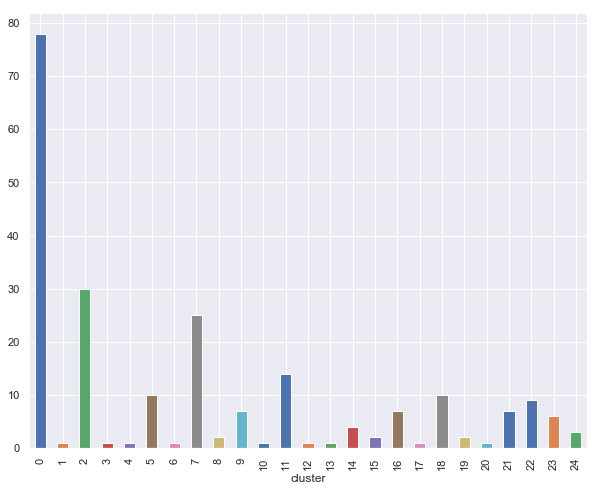

In [294]:
## Lets have a look at the most dense clusters
nairobi_restaurants.groupby('cluster')['Venue'].count().plot(kind='bar')

**From a look of the density of the various clusters I will only focus on the clusters with highest density of Restaurants and Hotels** i.e. _0, 2, 5, 7, 11, 16, 18, 21, 22, 23_

### Analysis of Cluster One: Nairobi CBD and Parklands

In [231]:
# Analysis of Cluster 1: Areas within Nairobi Central Business District
nairobi_restaurants[nairobi_restaurants.cluster == 0].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
6,Parklands/Highridge,-1.263062,36.810629,Southern Sun Mayfair,-1.262520,36.808652,Hotel,0
7,Parklands/Highridge,-1.263062,36.810629,La Maison Royale Hotel,-1.265329,36.808667,Hotel,0
10,Parklands/Highridge,-1.263062,36.810629,Ocean Basket @The Oval,-1.258567,36.805579,Seafood Restaurant,0
17,Parklands/Highridge,-1.263062,36.810629,Villa Rosa Kempinski,-1.271530,36.808799,Hotel,0
18,Parklands/Highridge,-1.263062,36.810629,Chowpaty,-1.265624,36.805119,Indian Restaurant,0


In [232]:
# Number of within Central Business District
cluster_one = nairobi_restaurants[nairobi_restaurants.cluster == 0]
cluster_one.shape[0]

78

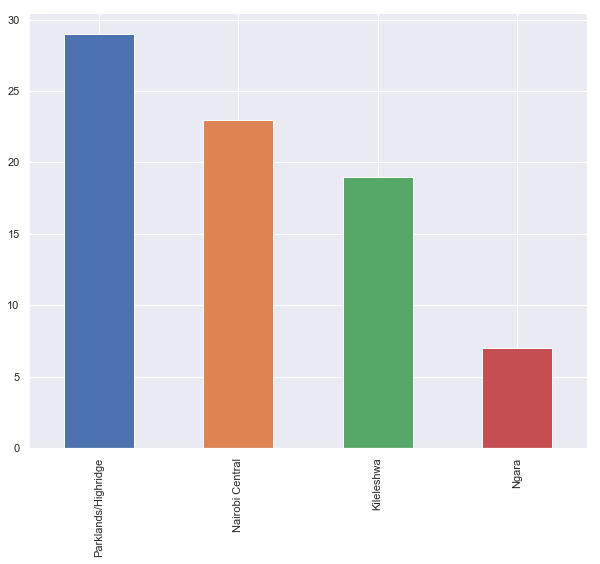

In [234]:
# Popular Neighbourhood in Cluster One
cluster_one["Neighborhood"].value_counts().plot(kind='bar')

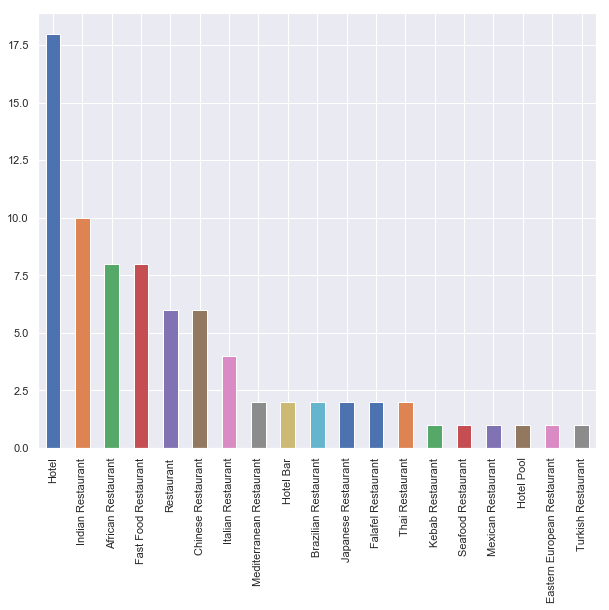

In [208]:
cluster_one['Venue Category'].value_counts().plot(kind='bar')

### Analysis of Cluster 3: Areas around Kilimani Area

In [226]:
# Analysis of Cluster 3: 
nairobi_restaurants[nairobi_restaurants.cluster == 2].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
118,Kilimani,-1.287442,36.784522,Fogo Gaucho,-1.290710,36.782990,Brazilian Restaurant,2
120,Kilimani,-1.287442,36.784522,Osteria del Chianti,-1.288796,36.790005,Italian Restaurant,2
121,Kilimani,-1.287442,36.784522,O'Sinkirri,-1.288368,36.787048,Seafood Restaurant,2
123,Kilimani,-1.287442,36.784522,Habesha,-1.292236,36.780006,Ethiopian Restaurant,2
124,Kilimani,-1.287442,36.784522,G Pot,-1.291939,36.791417,African Restaurant,2


In [228]:
cluster_three = nairobi_restaurants[nairobi_restaurants.cluster == 2]
cluster_three.shape[0]

30

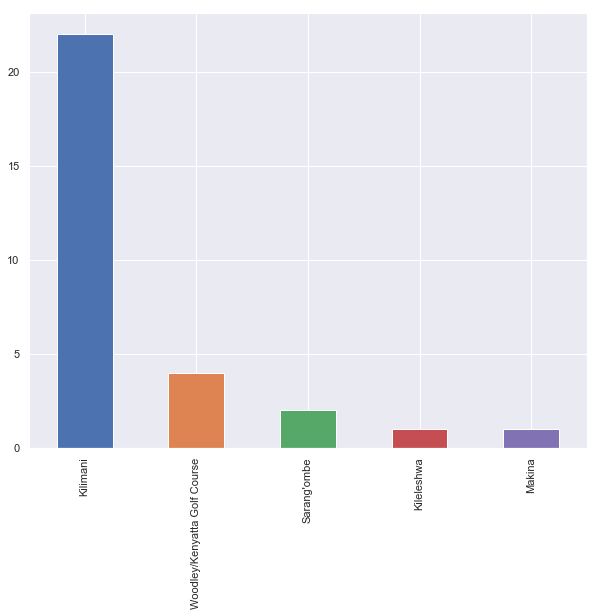

In [235]:
# Popular Neighbourhood in Cluster One
cluster_three["Neighborhood"].value_counts().plot(kind='bar')

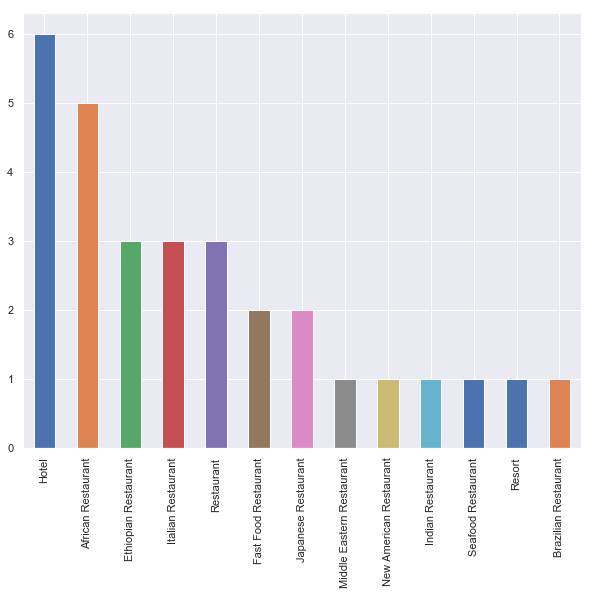

In [229]:
cluster_three['Venue Category'].value_counts().plot(kind='bar')

### Analysis of Cluster 6: Karen Area

In [258]:
nairobi_restaurants[nairobi_restaurants.cluster == 5].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
234,Karen,-1.328375,36.704968,Talisman,-1.322966,36.703348,Mediterranean Restaurant,5
242,Karen,-1.328375,36.704968,Open House Restaurant Karen,-1.323774,36.708288,Indian Restaurant,5
247,Karen,-1.328375,36.704968,Que Pasa,-1.323020,36.706557,Italian Restaurant,5
252,Karen,-1.328375,36.704968,Picazzo,-1.320131,36.703297,Spanish Restaurant,5
255,Karen,-1.328375,36.704968,Osteria Karen,-1.323881,36.700801,Italian Restaurant,5


In [259]:
cluster_six = nairobi_restaurants[nairobi_restaurants.cluster == 5]
cluster_six.shape[0]

10

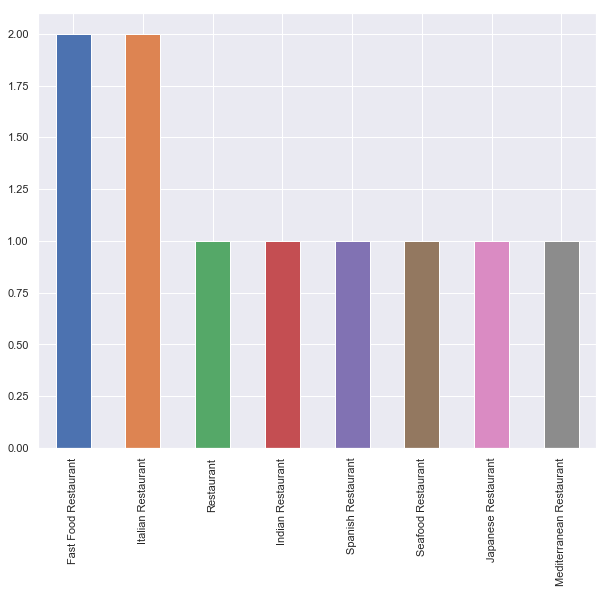

In [260]:
cluster_six['Venue Category'].value_counts().plot(kind='bar')

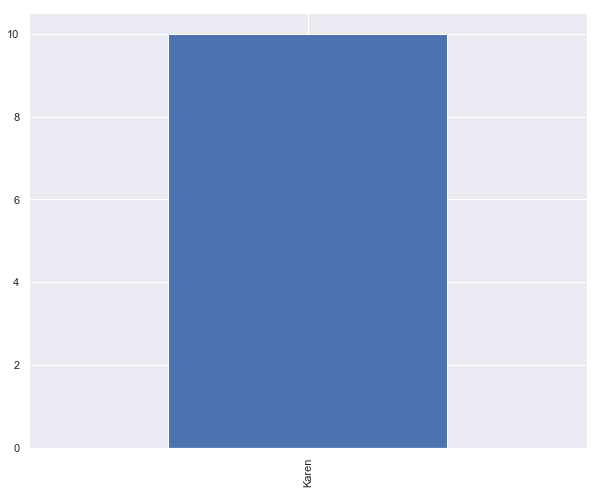

In [261]:
# Popular Neighbourhood in Cluster Six
cluster_six["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 8: Nairobi West, South C and Nairobi South Area

In [254]:
nairobi_restaurants[nairobi_restaurants.cluster == 7].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
285,Nairobi West,-1.308702,36.823097,Mc Frys Nairobi West,-1.307823,36.823735,Fast Food Restaurant,7
287,Nairobi West,-1.308702,36.823097,Martha's,-1.312285,36.816696,Fast Food Restaurant,7
288,Nairobi West,-1.308702,36.823097,Hill Park Hotel,-1.300217,36.820293,Hotel,7
291,Nairobi West,-1.308702,36.823097,Mvuli House,-1.306063,36.823736,Hotel,7
299,Nairobi West,-1.308702,36.823097,Nyayo Poolside Restaurant,-1.302631,36.824299,Restaurant,7


In [255]:
cluster_eight = nairobi_restaurants[nairobi_restaurants.cluster == 7]
cluster_eight.shape[0]

25

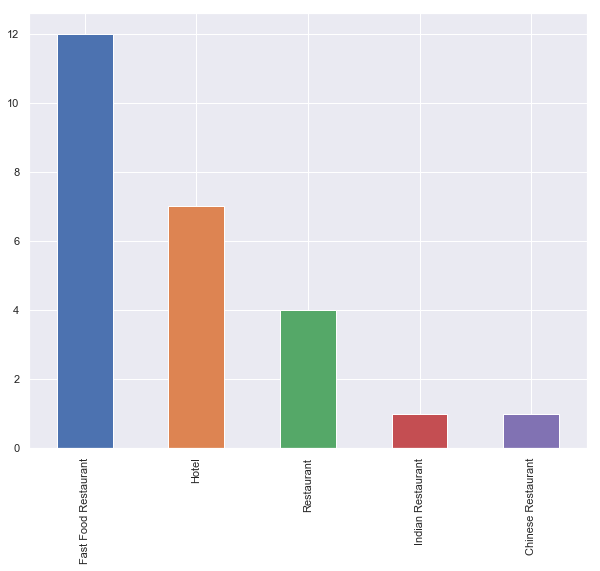

In [256]:
cluster_eight['Venue Category'].value_counts().plot(kind='bar')

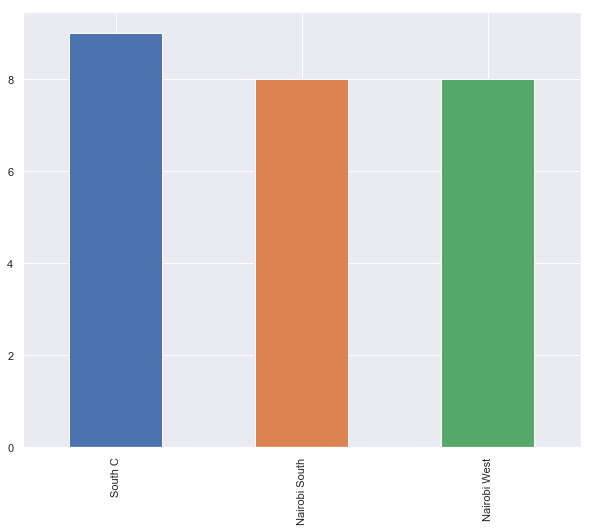

In [257]:
# Popular Neighbourhood in Cluster Six
cluster_eight["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 12: Roysambu, Kasarani, Zimmerman

In [262]:
nairobi_restaurants[nairobi_restaurants.cluster == 11].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
443,Zimmerman,-1.210397,36.895221,kenchic kasarani,-1.218220,36.896300,Fast Food Restaurant,11
455,Zimmerman,-1.210397,36.895221,Car Wash Kasarani,-1.218015,36.898590,Restaurant,11
464,Roysambu,-1.218840,36.886739,Thika Road Mall Food Court,-1.219415,36.887769,Restaurant,11
466,Roysambu,-1.218840,36.886739,Safari Park Hotel,-1.224948,36.883962,Hotel,11
472,Roysambu,-1.218840,36.886739,Safari Park hotel and casino,-1.224980,36.883784,Hotel,11


In [265]:
cluster_12 = nairobi_restaurants[nairobi_restaurants.cluster == 11]
cluster_12.shape[0]

14

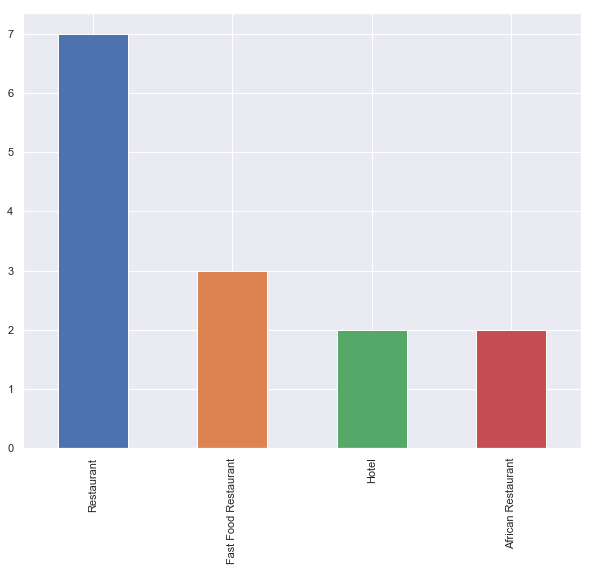

In [266]:
cluster_12['Venue Category'].value_counts().plot(kind='bar')

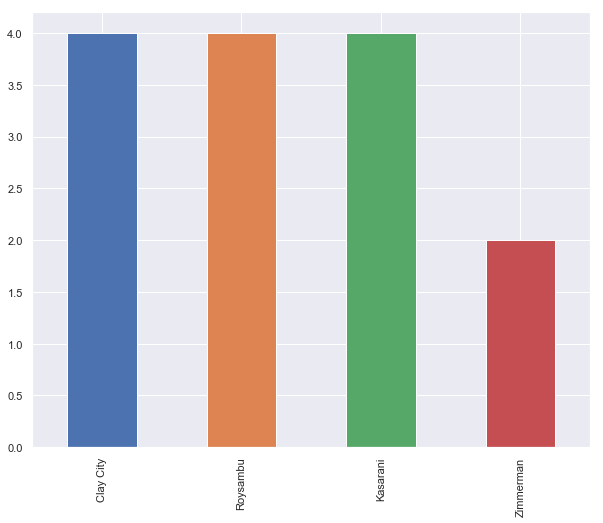

In [267]:
# Popular Neighbourhood in Cluster Six
cluster_12["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 17: Kayole Area, Komarock

In [268]:
nairobi_restaurants[nairobi_restaurants.cluster == 16].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
589,Kayole North,-1.265984,36.916946,Kwa Chipo za Aleki/Masha,-1.263702,36.914805,Fast Food Restaurant,16
594,Kayole North,-1.265984,36.916946,Wawaki Mall,-1.269216,36.911602,Fast Food Restaurant,16
599,Kayole Central,-1.265984,36.916946,Kwa Chipo za Aleki/Masha,-1.263702,36.914805,Fast Food Restaurant,16
604,Kayole Central,-1.265984,36.916946,Wawaki Mall,-1.269216,36.911602,Fast Food Restaurant,16
609,Kayole South,-1.265984,36.916946,Kwa Chipo za Aleki/Masha,-1.263702,36.914805,Fast Food Restaurant,16


In [270]:
cluster_17 = nairobi_restaurants[nairobi_restaurants.cluster == 16]
cluster_17.shape[0]

7

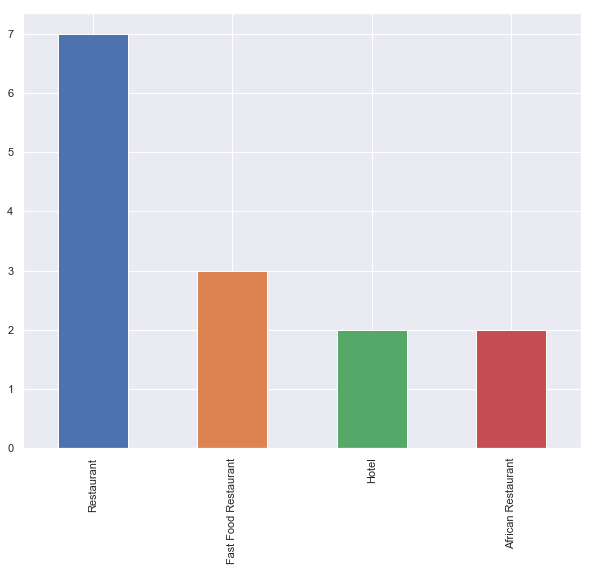

In [271]:
cluster_12['Venue Category'].value_counts().plot(kind='bar')

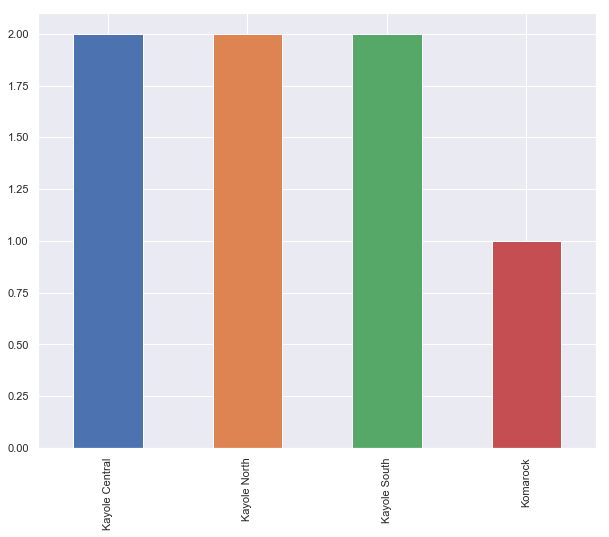

In [273]:
# Popular Neighbourhood in Cluster Six
cluster_17["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 19: Embakasi Area

In [274]:
nairobi_restaurants[nairobi_restaurants.cluster == 18].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
639,Upper Savanna,-1.324728,36.887724,Kenchic Imara Daima,-1.325542,36.887518,Fast Food Restaurant,18
647,Upper Savanna,-1.324728,36.887724,Chicken Inn-Embakasi,-1.328278,36.892707,Fast Food Restaurant,18
652,Lower Savanna,-1.324728,36.887724,Kenchic Imara Daima,-1.325542,36.887518,Fast Food Restaurant,18
660,Lower Savanna,-1.324728,36.887724,Chicken Inn-Embakasi,-1.328278,36.892707,Fast Food Restaurant,18
665,Embakasi,-1.324728,36.887724,Kenchic Imara Daima,-1.325542,36.887518,Fast Food Restaurant,18


In [275]:
cluster_19 = nairobi_restaurants[nairobi_restaurants.cluster == 18]
cluster_19.shape[0]

10

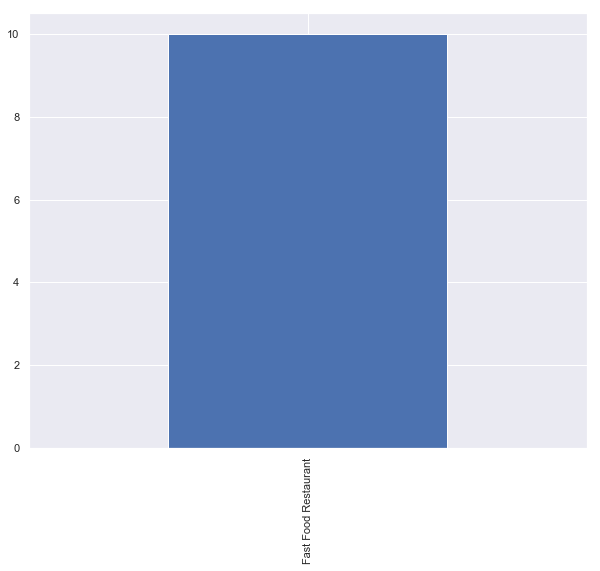

In [343]:
cluster_19['Venue Category'].value_counts().plot(kind='bar')

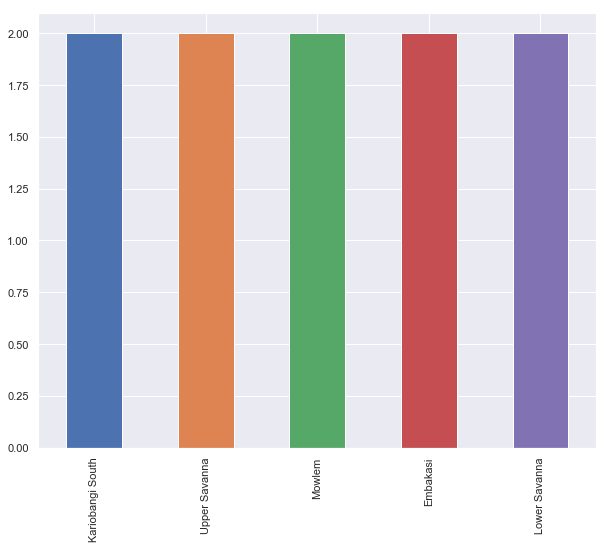

In [344]:
# Popular Neighbourhood in Cluster Six
cluster_19["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 22: Makongeni and Hamsa

In [278]:
nairobi_restaurants[nairobi_restaurants.cluster == 21].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
736,Makongeni,-1.28731,36.872107,Pop Inn Cafe - Jericho Market,-1.287709,36.873838,Fast Food Restaurant,21
737,Makongeni,-1.28731,36.872107,Jerusalem,-1.285198,36.867929,Resort,21
740,Makongeni,-1.28731,36.872107,Jimlizer Hotel,-1.288470,36.877875,Hotel,21
755,Makongeni,-1.28731,36.872107,Creamy Inn-Buruburu,-1.294855,36.876833,Fast Food Restaurant,21
756,Makongeni,-1.28731,36.872107,Chicken Inn-Buruburu,-1.294855,36.876833,Fast Food Restaurant,21


In [279]:
cluster_22 = nairobi_restaurants[nairobi_restaurants.cluster == 21]
cluster_22.shape[0]

7

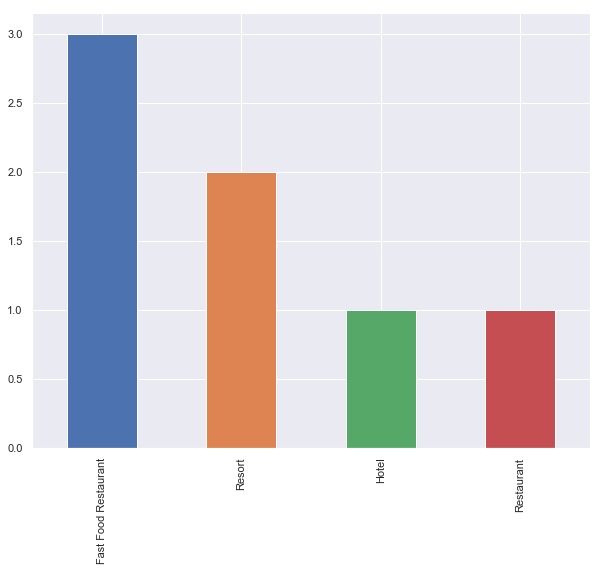

In [280]:
cluster_22['Venue Category'].value_counts().plot(kind='bar')

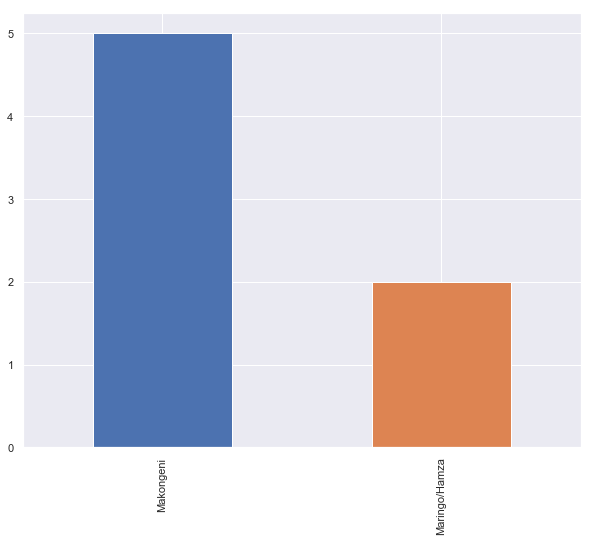

In [281]:
# Popular Neighbourhood in Cluster 22
cluster_22["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 23: Eastleigh, Pumwani Area

In [282]:
nairobi_restaurants[nairobi_restaurants.cluster == 22].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
782,Pumwani,-1.279758,36.844269,MPAMBE DISHES,-1.283997,36.847273,African Restaurant,22
784,Pumwani,-1.279758,36.844269,Grand Royal Hotel Eastleigh,-1.278988,36.851195,Hotel,22
785,Pumwani,-1.279758,36.844269,Nomad Palace Hotel,-1.279803,36.848178,Hotel,22
795,Eastleigh North,-1.277829,36.848683,MPAMBE DISHES,-1.283997,36.847273,African Restaurant,22
796,Eastleigh North,-1.277829,36.848683,Grand Royal Hotel Eastleigh,-1.278988,36.851195,Hotel,22


In [283]:
cluster_23 = nairobi_restaurants[nairobi_restaurants.cluster == 22]
cluster_23.shape[0]

9

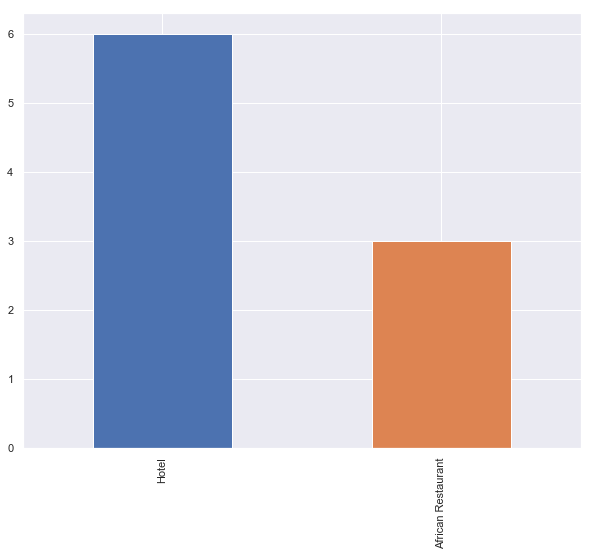

In [284]:
cluster_23['Venue Category'].value_counts().plot(kind='bar')

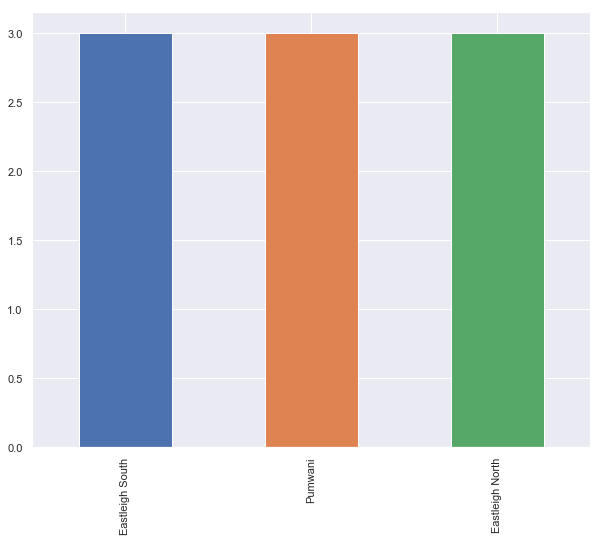

In [285]:
# Popular Neighbourhood in Cluster 23
cluster_23["Neighborhood"].value_counts().plot(kind='bar')

### Analysis of Cluster 25: Huruma Area, Kiamiko

In [286]:
nairobi_restaurants[nairobi_restaurants.cluster == 24].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,cluster
1024,Huruma,-1.257646,36.872598,Jonsaga Travellers Inn,-1.260071,36.874302,Restaurant,24
1032,Ngei,-1.259469,36.866781,Jonsaga Travellers Inn,-1.260071,36.874302,Restaurant,24
1051,Kiamaiko,-1.253778,36.875732,Jonsaga Travellers Inn,-1.260071,36.874302,Restaurant,24


In [289]:
cluster_25 = nairobi_restaurants[nairobi_restaurants.cluster == 24]
cluster_25.shape[0]

3

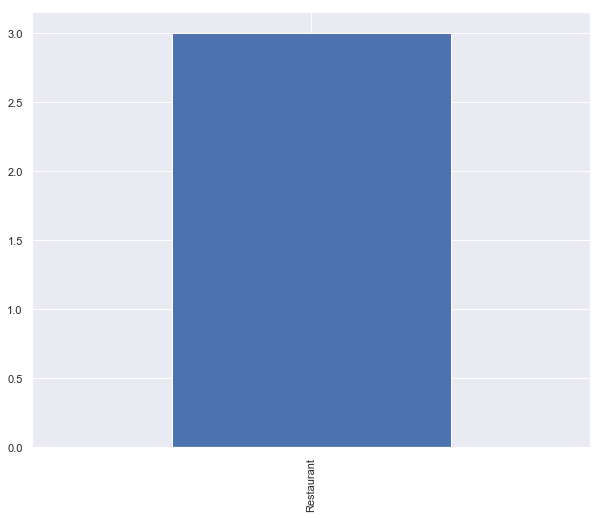

In [291]:
cluster_25['Venue Category'].value_counts().plot(kind='bar')

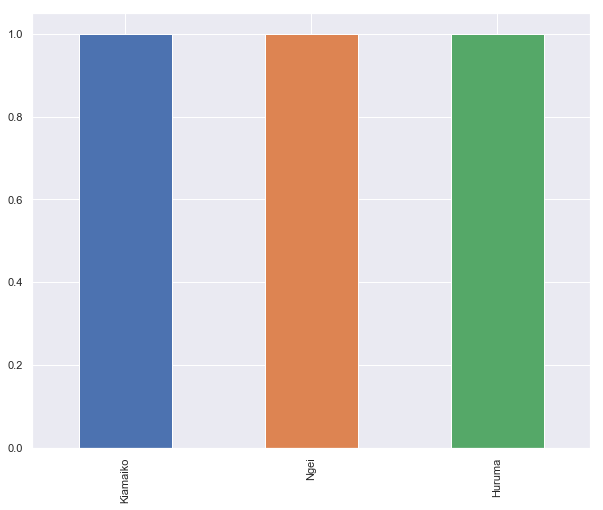

In [326]:
# Popular Neighbourhood in Cluster 23
cluster_25["Neighborhood"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Embakasi Area')

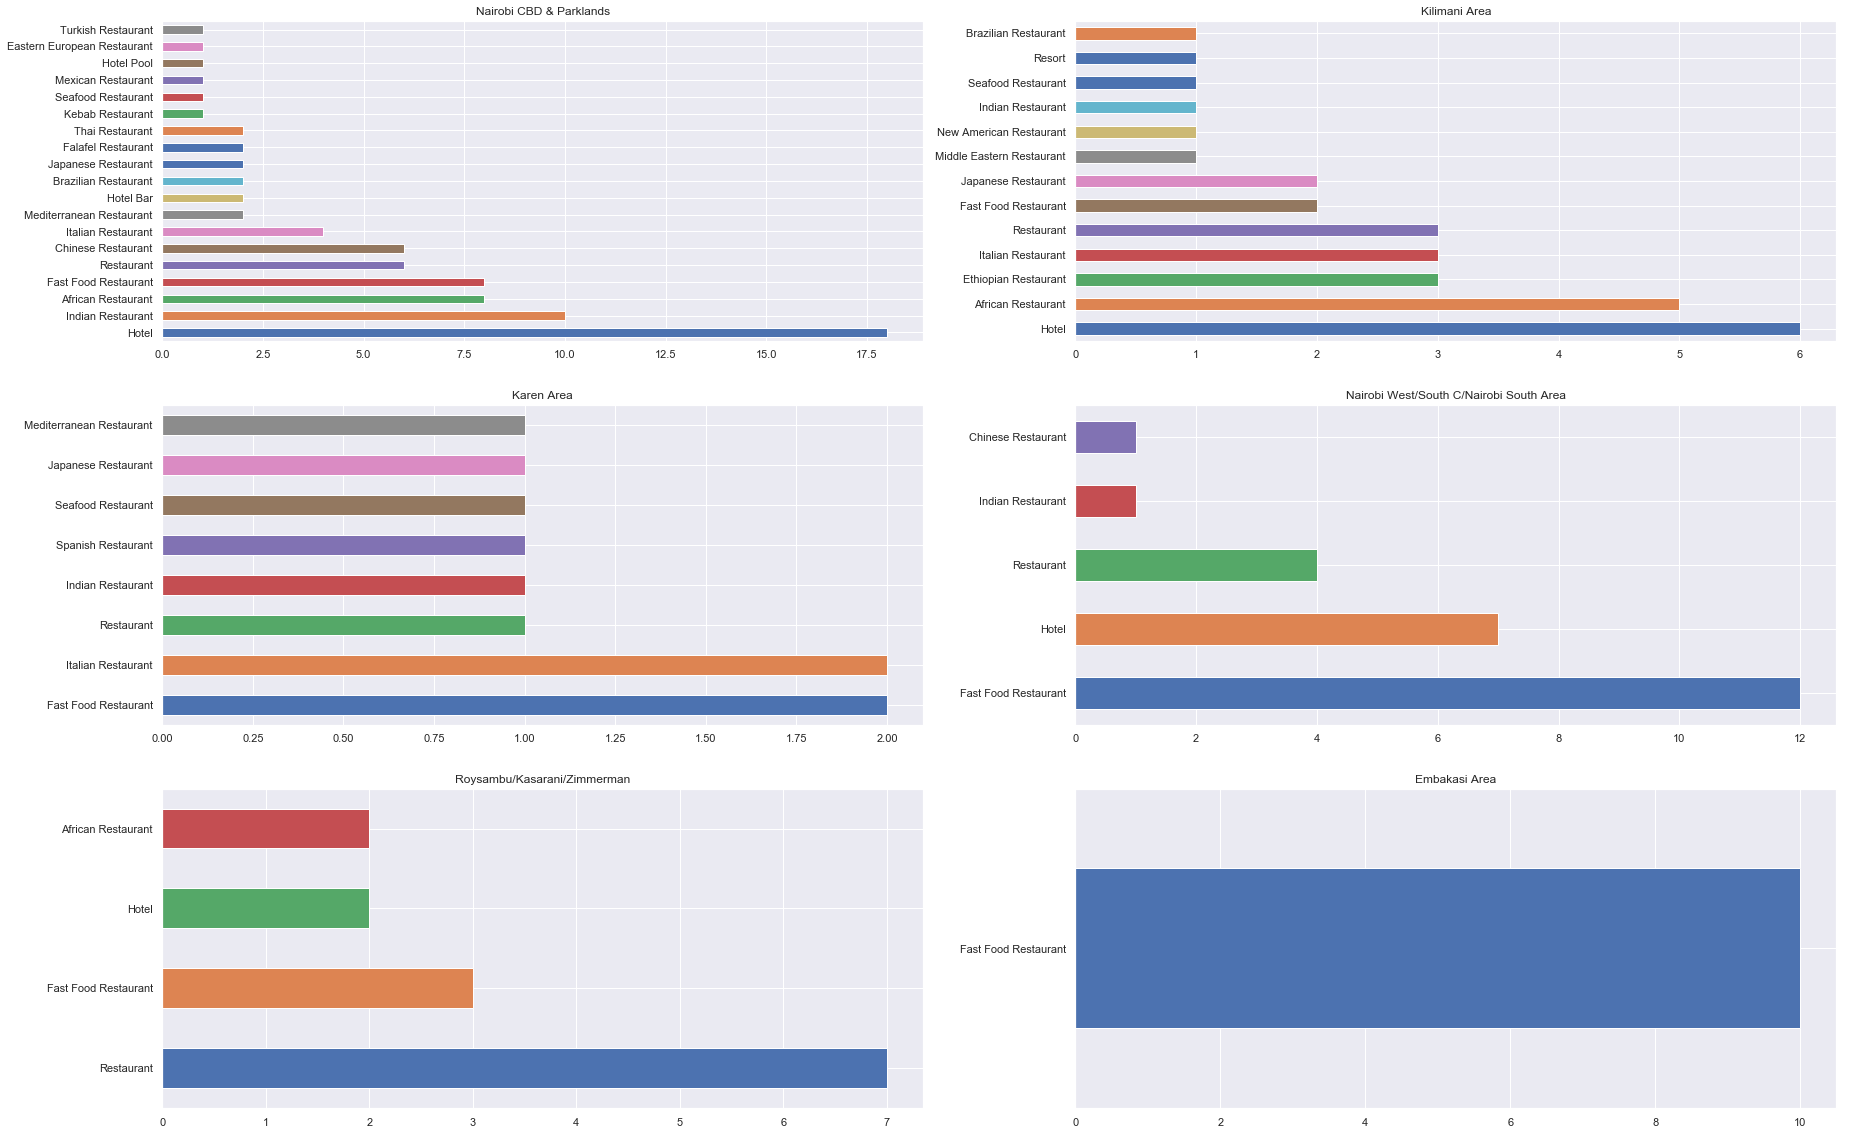

In [345]:
# cluster_three
# cluster_six
# cluster_eight
# cluster_12

f, ax = plt.subplots(3, 2, figsize=(30, 20))

cluster_one['Venue Category'].value_counts().plot(kind='barh', ax=ax[0][0])
ax[0][0].set_title("Nairobi CBD & Parklands")

cluster_three['Venue Category'].value_counts().plot(kind='barh', ax=ax[0][1])
ax[0][1].set_title("Kilimani Area")

cluster_six['Venue Category'].value_counts().plot(kind='barh', ax=ax[1][0])
ax[1][0].set_title("Karen Area")

cluster_eight['Venue Category'].value_counts().plot(kind='barh', ax=ax[1][1])
ax[1][1].set_title("Nairobi West/South C/Nairobi South Area")

cluster_12['Venue Category'].value_counts().plot(kind='barh', ax=ax[2][0])
ax[2][0].set_title("Roysambu/Kasarani/Zimmerman")

cluster_19['Venue Category'].value_counts().plot(kind='barh', ax=ax[2][1])
ax[2][1].set_title("Embakasi Area")



## Conclusion

From the analysis above I was able to Identify the following:
 - Most restaurants in Nairobi are located within the Central Business District and Consitute the most preferred restaurants by Delegates or Political Guests to Kenya. Areas within Nairobi Area have a total of 78 Restaurants/Hotels
 - Within Nairobi Central Business District, Karen area and Kilimani area: The number of international food serving restaurants are high, this is enough to give us some notion of population diversity within the area. It would therefore be best to launch a restaurant based on a given nationality within this areas e.g. Mexican, Spaniads, Indians, Japanese, Chinese, Ethiopian
 - Nairobi CBD and Parklands have the highest number of Restaurants Density ie. 78 in total which I feel is already clogged with competition therefore it would be best to venture into Karen area and Kilimani area with is still low compared to CBD/Parklands i.e. 30 and 10 respectively
 - Upcoming Areas for growth are Kasarani/Roysambu and Nairobi West/South C and Nairobi South area: Launching a Restaurant within this areas might prove to be a first mover advantage given the current growth in the number of international citizens within these areas.

### The best Location to Launch a new Restaurant in Nairobi are as follows based on Categories

- For Multicultural Food restaurant the best bet for a Location would be around Kilimani Area and Karen Area. Eventhough there is a bit of competition based on the current number of restaurant offering international cuisines, this is the place to find the population with the multicultural taste buds.
- For government focused, international delegates kind of hotel/restaurants - areas within and around the Central Business District and Parklands Areaa where the UN, US Embassy are located would be an ideal set up.
- For quick meals and fast foods, areas around Nairobi West, South C would be the best zones given the party activities around these areas, clubs and casinos.

In [365]:
# Cluster 1 - Representing - Restaurant targeting delegates etc.
print(centermost_points.iloc[0])

# Cluster 3 - Three
centermost_points.iloc[2]

# Cluster 12

(-1.2715815728844049, 36.810034799891326)


(-1.2911983519750818, 36.78522152164099)

## Final Geographical Mapping based on Findings

In [370]:
address = 'Nairobi, Kenya'

geolocator = Nominatim(user_agent="nairobi_explore")
location = geolocator.geocode(address)
nrb_latitude = location.latitude
nrb_longitude = location.longitude
print('The geograpical coordinate of Nairobi are {}, {}.'.format(latitude, longitude))

map_nairobi = folium.Map(location=[nrb_latitude, nrb_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nairobi_restaurants['Venue Latitude'], nairobi_restaurants['Venue Longitude'], nairobi_restaurants['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00A86B',
        fill_opacity=0.7).add_to(map_nairobi)
    
folium.Circle(
    location=[centermost_points.iloc[0][0], centermost_points.iloc[0][1]],
    radius=1000,
    popup='Restaurants targeting Delegates, Government Officials',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map_nairobi)


folium.Circle(
    location=[centermost_points.iloc[2][0], centermost_points.iloc[2][1]],
    radius=1000,
    popup='Restaurants targeting Delegates, Government Officials',
    color='#ffa500',
    fill=True,
    fill_color='#ffa500'
).add_to(map_nairobi)


folium.Circle(
    location=[centermost_points.iloc[5][0], centermost_points.iloc[5][1]],
    radius=1000,
    popup='Restaurants targeting Delegates, Government Officials',
    color='#ffa500',
    fill=True,
    fill_color='#ffa500'
).add_to(map_nairobi)


folium.Circle(
    location=[centermost_points.iloc[11][0], centermost_points.iloc[11][1]],
    radius=1000,
    popup='Restaurants targeting Delegates, Government Officials',
    color='#ff69b4',
    fill=True,
    fill_color='#ff69b4'
).add_to(map_nairobi)


folium.Circle(
    location=[centermost_points.iloc[7][0], centermost_points.iloc[7][1]],
    radius=1000,
    popup='Restaurants targeting Delegates, Government Officials',
    color='#ff69b4',
    fill=True,
    fill_color='#ff69b4'
).add_to(map_nairobi)
    
map_nairobi

The geograpical coordinate of Nairobi are -1.2832533, 36.8172449.


**Orange Location:** - Good for Restaurants focused on International Cuisines since there's a good number of international citizens as well as multicultured Nairobians.  
**Pink Location:** - These are upcoming regions with growing demand for restaurants and hotels - Good places to Launch a new Restaurants, it also has growing number of International Citizens.  
**Blue Location:** - This location is suitable for Delegates, International Citizens coming for political reasons, Embassy Guests etc.